In [6]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt

In [7]:
csv_in =  path.join('..', 'data', 'healthcare-dataset-stroke-data.csv')
df_in = pd.read_csv(csv_in)
df_in.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
feature = 'smoking_status'
list(set(df_in[feature].tolist()))

['never smoked', 'Unknown', 'smokes', 'formerly smoked']

### Smoke or non-smoke

In [3]:
mask = df_in["smoking_status"] == "Unknown"
df_unknown = df_in[mask]

In [4]:
df_unknown.shape

(1544, 12)

In [9]:
# Filter Unknown
mask = df_in["smoking_status"] != "Unknown"
df_smoke_non_smoke = df_in[mask]
df_smoke_non_smoke.shape
#df_in["smoking_status"]

(3566, 12)

In [9]:
# smoke and stroke
mask1 = df_smoke_non_smoke["smoking_status"] == "never smoked"
df1 = df_smoke_non_smoke[mask1]
mask2 = df1["stroke"] == 1
df2 = df1[mask2]

In [10]:
df2.shape

(90, 12)

In [11]:
# smoke and stroke
mask1 = df_smoke_non_smoke["smoking_status"] == "never smoked"
df1 = df_smoke_non_smoke[mask1]
mask2 = df1["stroke"] == 0
df2 = df1[mask2]
df2.shape

(1802, 12)

In [13]:
# smoke and stroke
mask1 = df_smoke_non_smoke["smoking_status"] != "never smoked"
df1 = df_smoke_non_smoke[mask1]
mask2 = df1["stroke"] == 0
df2 = df1[mask2]
df2.shape

(1562, 12)

### Age vs Smokes

In [18]:
mask = df_smoke_non_smoke["stroke"] == 1
df_smoke_non_smoke_stroke = df_smoke_non_smoke[mask]

In [19]:
xarray = df_smoke_non_smoke_stroke['age']
yarray = df_smoke_non_smoke_stroke['smoking_status'].map({'never smoked': 0, 'smokes': 1, 'formerly smoked': 2})

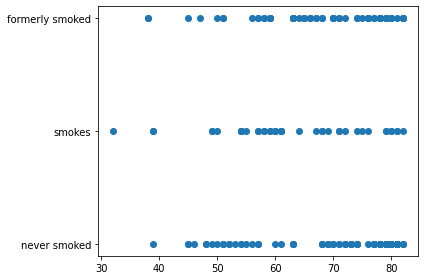

In [20]:
fig, ax = plt.subplots()

ax.scatter(xarray, yarray)
ax.set_yticks([0,1,2])
ax.set_yticklabels(['never smoked', 'smokes', 'formerly smoked'])

plt.tight_layout()
#plt.savefig()
plt.show()